サンプルサイズを大きくしても、95%信頼区間に母平均が含まれる回数は大体100回に95回になるのか

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# エラーバー表示する関数
def plot_result(y, y_err):
    fig = plt.figure(figsize=(14, 7), dpi=180)
    ax = fig.add_subplot(111)
    x = np.arange(1, 101)
    ax.errorbar(x, y, yerr=y_err, capsize=5, fmt='o', markersize=5, ecolor="black", markeredgecolor = "black", color='w')
    ax.hlines(170, 1, 100, color="blue")
    plt.grid()
    plt.show()
    plt.close()

95%信頼区間に母平均が含まれなかった回数：7
95%信頼区間に母平均が含まれなかった割合：0.07


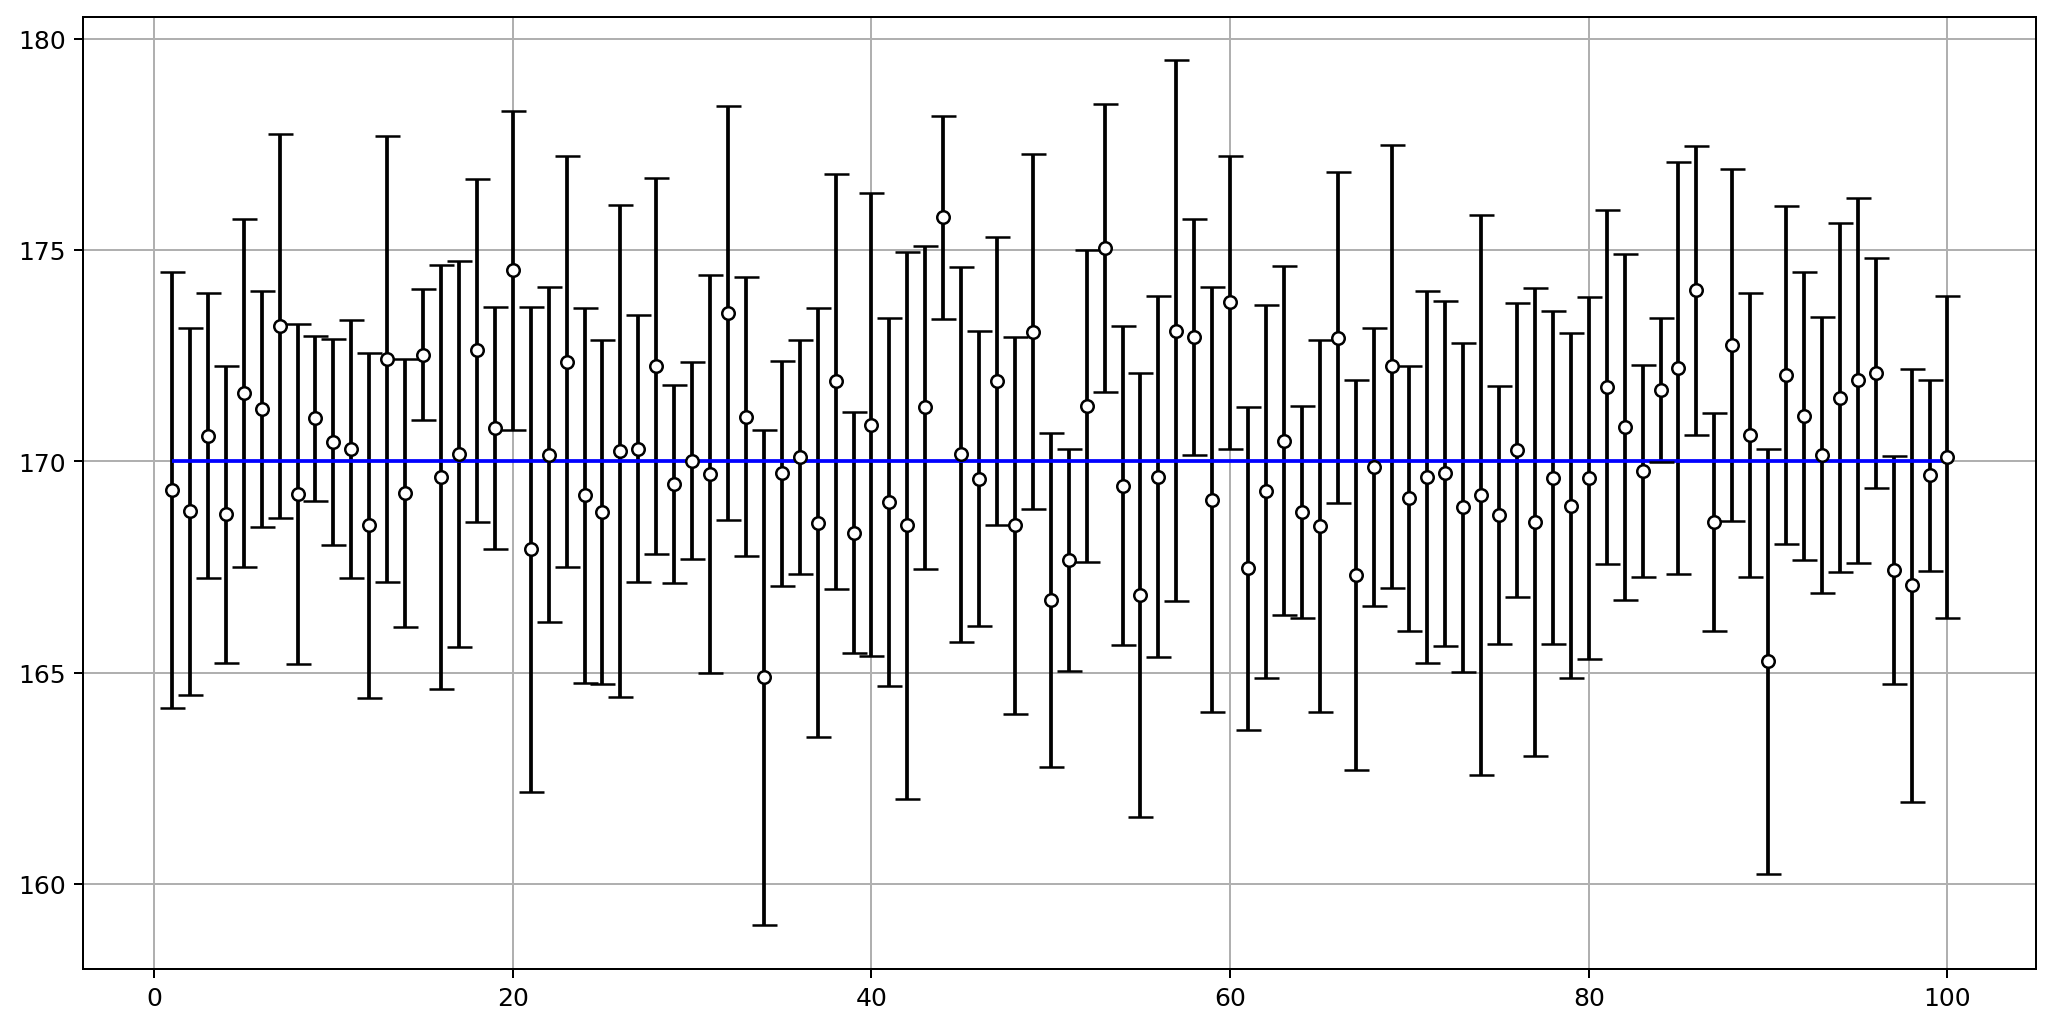

In [3]:
np.random.seed(1)
mu = 170 # 母平均
std = 7 # 母標準偏差
n = 10 # サンプルサイズ
alpha = 0.95 # α%信頼区間
cnt = 0
y = []
y_err = []

# サンプルサイズn=10で母平均の95%区間推定を100回やったときに、何回信頼区間に母平均が含まれるかを求める
for _ in range(100):
    sample_data = np.random.normal(mu, std, n) # サンプルデータの取得
    sample_mu = np.mean(sample_data) # 標本平均を求める
    sample_std = np.std(sample_data) # 標本標準偏差を求める
    lower_cl, upper_cl = stats.norm.interval(alpha=alpha, loc=sample_mu, scale=sample_std/np.sqrt(n)) # 信頼限界を求める
    if lower_cl <= mu <= upper_cl: # 母平均が上限、下限信頼限界に含まれていたらカウント
        cnt+=1
    y.append(sample_mu) # 標本平均を記録
    y_err.append(upper_cl - sample_mu) # 95%信頼区間を記録
print(f"95%信頼区間に母平均が含まれなかった回数：{100-cnt}")
print(f"95%信頼区間に母平均が含まれなかった割合：{(100-cnt) / 100}")
plot_result(y, y_err)

95%信頼区間に母平均が含まれなかった回数：3
95%信頼区間に母平均が含まれなかった割合：0.03


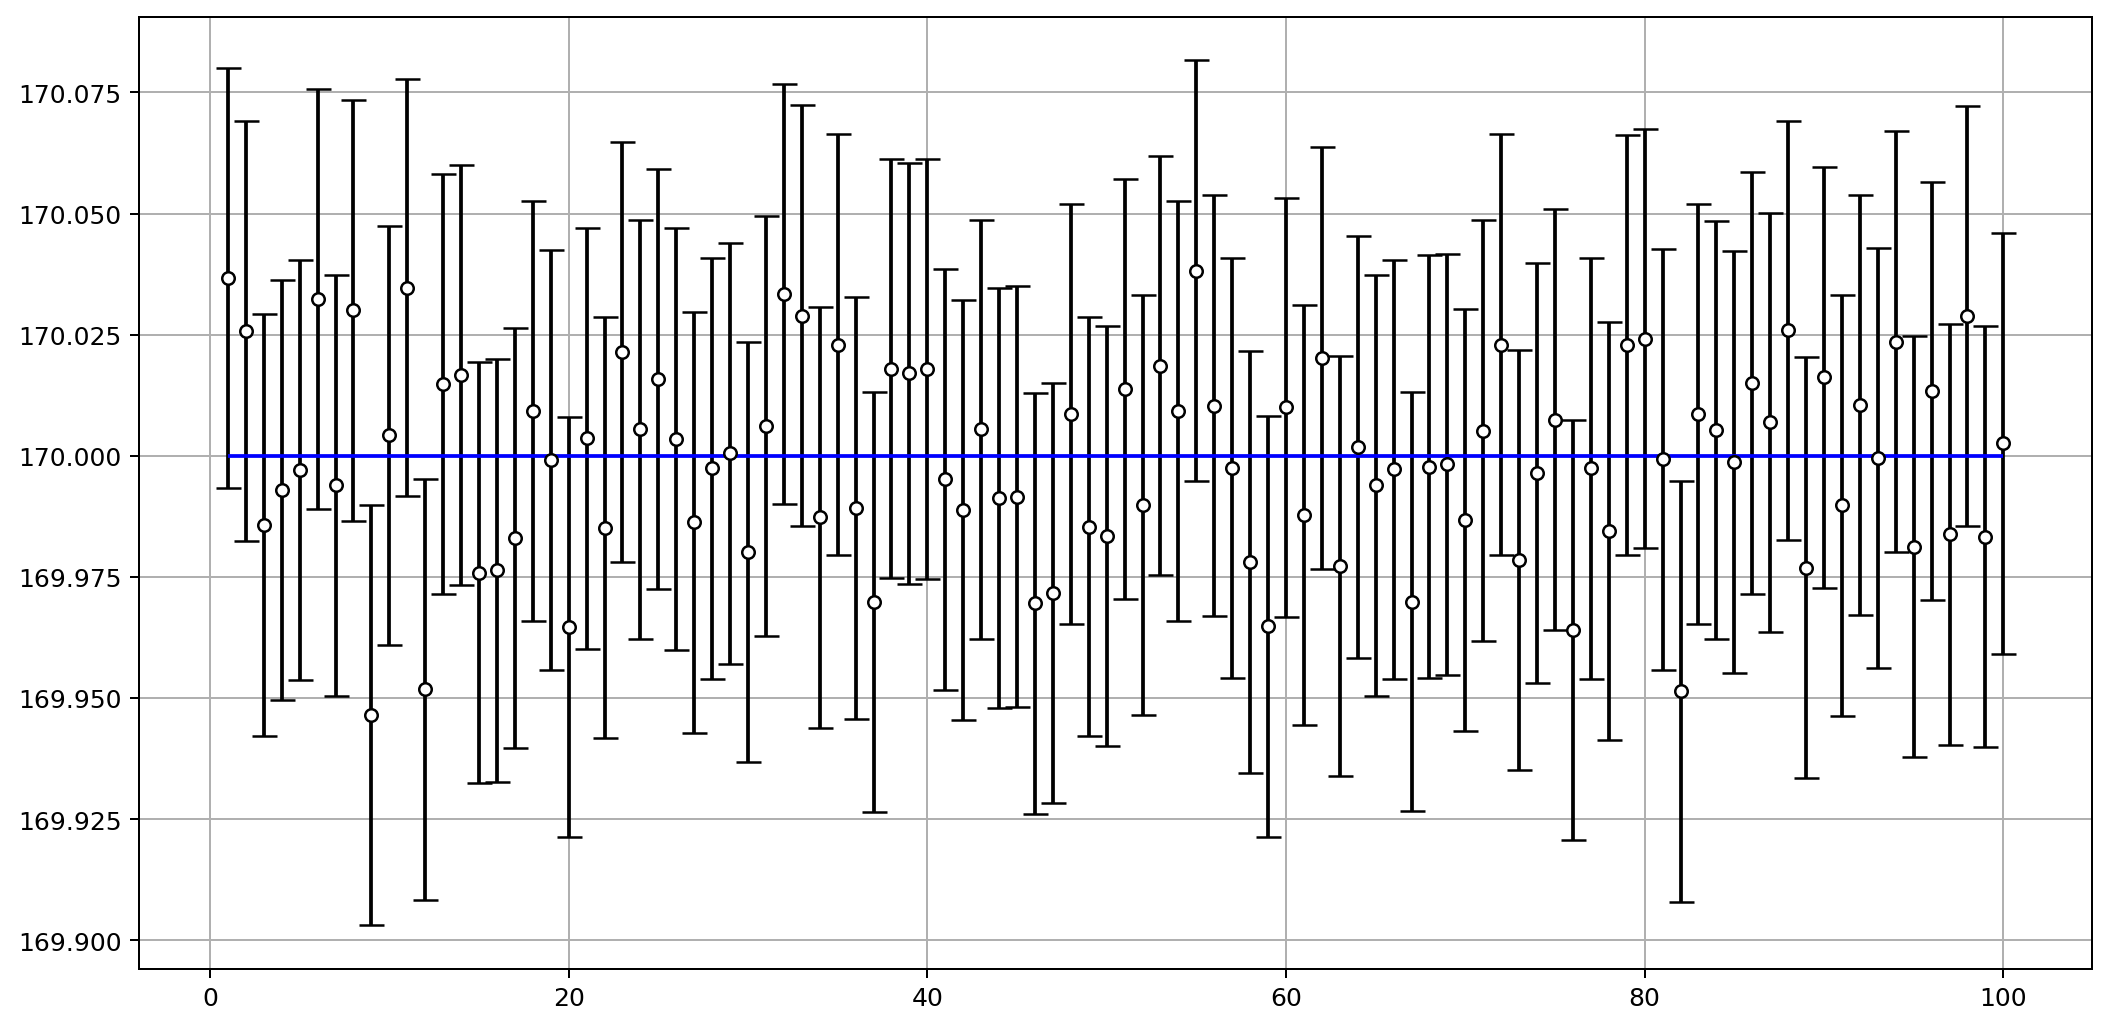

In [4]:
# サンプルサイズを10万に変更
np.random.seed(1)
n = 100000 # サンプルサイズ
cnt = 0
y = []
y_err = []

# サンプルサイズn=100000で母平均の95%区間推定を100回やったときに、何回信頼区間に母平均が含まれるかを求める
for _ in range(100):
    sample_data = np.random.normal(mu, std, n)
    sample_mu = np.mean(sample_data)
    sample_std = np.std(sample_data)
    lower_cl, upper_cl = stats.norm.interval(alpha=alpha, loc=sample_mu, scale=sample_std/np.sqrt(n))
    if lower_cl <= mu <= upper_cl:
        cnt+=1
    y.append(sample_mu)
    y_err.append(upper_cl - sample_mu)
print(f"95%信頼区間に母平均が含まれなかった回数：{100-cnt}")
print(f"95%信頼区間に母平均が含まれなかった割合：{(100-cnt) / 100}")
plot_result(y, y_err)

実験回数を100回から10000回にする

In [5]:
np.random.seed(1)
n = 10 # サンプルサイズ
cnt = 0

# サンプルサイズn=10で母平均の95%区間推定を10000回やったときに、何回信頼区間に母平均が含まれるかを求める
for _ in range(10000):
    sample_data = np.random.normal(mu, std, n)
    sample_mu = np.mean(sample_data)
    sample_std = np.std(sample_data)
    lower_cl, upper_cl = stats.norm.interval(alpha=alpha, loc=sample_mu, scale=sample_std/np.sqrt(n))
    if lower_cl <= mu <= upper_cl:
        cnt+=1
print(f"95%信頼区間に母平均が含まれなかった回数：{10000-cnt}")
print(f"95%信頼区間に母平均が含まれなかった割合：{(10000-cnt) / 10000}")

95%信頼区間に母平均が含まれなかった回数：966
95%信頼区間に母平均が含まれなかった割合：0.0966


In [6]:
np.random.seed(1)
n = 100000 # サンプルサイズ
cnt = 0

# サンプルサイズn=100000で母平均の95%区間推定を10000回やったときに、何回信頼区間に母平均が含まれるかを求める
for _ in range(10000):
    sample_data = np.random.normal(mu, std, n)
    sample_mu = np.mean(sample_data)
    sample_std = np.std(sample_data)
    lower_cl, upper_cl = stats.norm.interval(alpha=alpha, loc=sample_mu, scale=sample_std/np.sqrt(n))
    if lower_cl <= mu <= upper_cl:
        cnt+=1
print(f"95%信頼区間に母平均が含まれなかった回数：{10000-cnt}")
print(f"95%信頼区間に母平均が含まれなかった割合：{(10000-cnt) / 10000}")

95%信頼区間に母平均が含まれなかった回数：495
95%信頼区間に母平均が含まれなかった割合：0.0495


サンプルサイズ10万で95%信頼区間を求めても、大体20回に1回は母平均がその区間に含まれていない